In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Для разбиения на выборки
from sklearn.model_selection import train_test_split

# Различные математические модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# Метрики качества
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Кросс-валидация
from sklearn.model_selection import GridSearchCV


In [125]:
df = pd.read_csv('train1.csv')
df = df.drop(columns=["Cabin"])
df = df.dropna()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [126]:
x = df.drop(columns=["Pclass"])
y = df["Pclass"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

print("Размер обучающей выборки:", x_train.shape)
print("Размер тестовой выборки:", x_test.shape)

Размер обучающей выборки: (499, 7)
Размер тестовой выборки: (215, 7)


Лучшие параметры: {'C': 32}
0.8776363636363638
Точность на тестовой выборке: 0.8418604651162791


<Axes: >

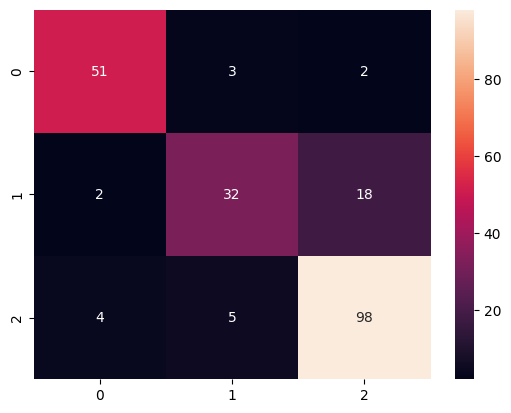

In [127]:
params = {'C' : range(1, 100, 1)}
log_reg = LogisticRegression(random_state = 1, max_iter=1000)

grid_search  = GridSearchCV(log_reg, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)



best_model = grid_search.best_estimator_
y_pred_log_reg = best_model.predict(x_test)

print(grid_search.best_score_)
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred_log_reg))

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot = True, fmt = '.0f')



Лучшие параметры: {'max_depth': np.int64(9), 'min_samples_leaf': 1}
0.9037979797979798
Точность на тестовой выборке: 0.9209302325581395


<Axes: >

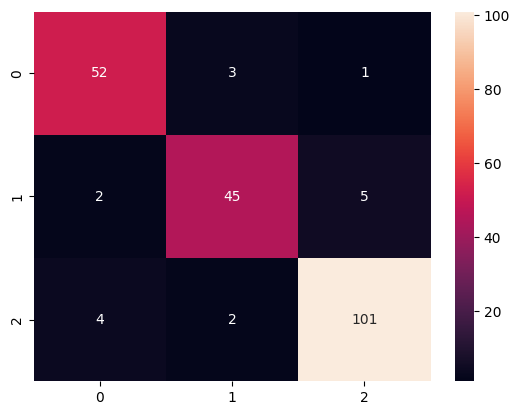

In [128]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1)


params = {
    "max_depth": np.arange(1, 15, 1),
    "min_samples_leaf": range(1, 15, 1)
}

grid_search = GridSearchCV(tree_clf, params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(x_test)

print(grid_search.best_score_)
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred_tree))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot = True, fmt = '.0f')

Лучшие параметры: {'n_estimators': 150}
Точность на тестовой выборке: 0.9209302325581395


<Axes: >

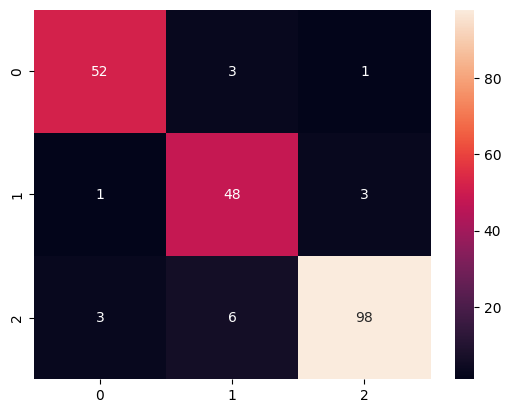

In [129]:
rf_clf = RandomForestClassifier(random_state=1)

params = {
    "n_estimators": range(100, 500, 50)
}

grid_search = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)


print("Лучшие параметры:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(x_test)
print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot = True, fmt = '.0f')

Модель с наилучшей точностью: Decision Tree
Точность Decision Tree: 0.9209


<Axes: >

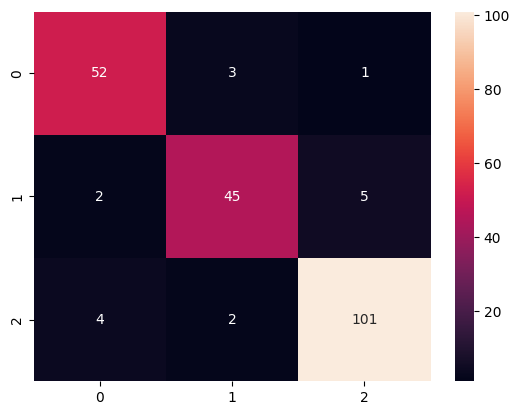

In [130]:
models = {'Logistic Regression': log_reg, 'Decision Tree': tree_clf, 'Random Forest': rf_clf}
predictions = {'Logistic Regression': y_pred_log_reg, 'Decision Tree': y_pred_tree, 'Random Forest': y_pred_rf}
    

best_model_name = max(models, key=lambda model: accuracy_score(y_test, predictions[model]))
cm = confusion_matrix(y_test, predictions[best_model_name])
accuracy = accuracy_score(y_test, predictions[best_model_name])

print(f"Модель с наилучшей точностью: {best_model_name}")
print(f"Точность {best_model_name}: {accuracy:.4f}")

sns.heatmap(cm, annot = True, fmt = '.0f')

In [131]:
from sklearn.metrics import mean_squared_error, r2_score


mse2 = mean_squared_error(y_test, predictions[best_model_name])
r2_2 = r2_score(y_test, predictions[best_model_name])
print(f'''{best_model_name}:
MSE = {mse2:.3f}
R^2 = {r2_2:.3f}''')


Decision Tree:
MSE = 0.149
R^2 = 0.788
